# Assignment 3
VADHRI VENKATA RATNAM

DATE : 07.04.2023

In [48]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, assemble
from numpy import pi
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
from qiskit.visualization import plot_state_qsphere
from qiskit import *
import numpy as np

# 1. Bell's inequality.

## Show that condition $ P_{same}(A,B) + P_{same}(A,C) + P_{same}(B,C) >= 1 $
Lets take an example of three properties A,B,C and their values which are same is $\pm$

if we take two objects that have properties A,B,C, they are identical as per the constraint below w.r.t one property. 

$ P_{same} (X, X) = 1 $

If Object 1 has property A as 1, then Object 2 has property A also as 1. 

The total probability of $P_{same}(A,B) + P_{diff}(A,B) = 1$

### Proof by example

Total possiblities of states. 

- 0,0,1 ( A == B )
- 0,1,1 ( B == C )
- 0,1,0 ( A == C )
- 0,0,0 ( A == B, A == C, B == C )
- 1,1,1 ( A == B, A == C, B == C )
- 1,0,1 ( A == C )
- 1,1,0 ( A == B )
- 1,0,0 ( B == C )


$ P_{same}(A,B) = 4/8 = 1/2 $

$ P_{same}(B,C) = 4/8 = 1/2 $

$ P_{same}(A,C) = 4/8 = 1/2 $

Hence, $ P_{same}(A,B) + P_{same}(B,C) + P_{same}(A,C) >= 1 $

### Proof by graphical representation.

![alternative text](./venn_diagram.png)

In the picture below, lets consider the total probability of A,B,C choice be equal to 1. 
P(A,B: C) = 1

$ P_{same} (A,B) + P_{same} (A,C) + ( P_{diff}(A,B) + P_{diff}(A,C) ) >= 1 $

The above statement can be read as above, The total probability that A == B, A == C and everything else ( inclusive of  B == C ) which is the rest of the circle ) 

Hence, $ P_{same}(A,B) + P_{same}(A,C) + P_{same}(B,C) >= 1 $

## Bell theorem is violated for quantum states with example 

$ \psi = \frac{1}{\sqrt2}(|00 \rangle + |11 \rangle) $

Lets validate the expression below.

$ A |0 \rangle = |0 \rangle = |a_{0} \rangle \quad A |1 \rangle = |1 \rangle = |a_{1} \rangle $

$ B |0 \rangle = \frac{1}{2} |0 \rangle + \frac{\sqrt3}{2} |1 \rangle = |b_{0} \rangle \quad B |1 \rangle = \frac{1}{2} |0 \rangle - \frac{\sqrt3}{2} |1 \rangle = |b_{1} \rangle$

$ C |0 \rangle = \frac{1}{2} |0 \rangle - \frac{\sqrt3}{2} |1 \rangle = |c_{0} \rangle \quad C |1 \rangle = \frac{1}{2} |0 \rangle + \frac{\sqrt3}{2} |1 \rangle = |c_{1} \rangle$

That would transalte to the below. 

$ |0 \rangle = |a_0 \rangle \quad |1 \rangle = |a_1 \rangle $

$ |0 \rangle = \frac{1}{2} (|b_0 \rangle + \sqrt3 |b_1 \rangle ) \quad |1 \rangle = \frac{1}{2} (\sqrt3|b_0 \rangle - |b_1 \rangle ) $  

$ |0 \rangle = \frac{1}{2} (|c_0 \rangle + \sqrt3 |c_1 \rangle) \quad |1 \rangle = \frac{-1}{2} (\sqrt3|c_0 \rangle-|c_1 \rangle) $

Lets calcuate the expression below. 

$ P_{same}(A,B) + P_{same}(B,C) + P_{same}(A,C) $


$ |\psi\rangle = \frac{1}{\sqrt2}(|0 \rangle |0 \rangle + |1 \rangle |1 \rangle) $

$ \quad =  \frac{1}{\sqrt2} \begin{bmatrix} |a_0 \rangle \frac{1}{2}(|b_0 \rangle + \sqrt3 |b_1 \rangle ) + |a_1 \rangle \frac{1}{2}(\sqrt3|b_0 \rangle - |b_1 \rangle ) |\end{bmatrix} $

$ \quad = \frac{1}{2\sqrt2} \begin{bmatrix} |a_0b_0 \rangle + \sqrt3 |a_0b_1 \rangle + \sqrt3 |a_1 b_0 \rangle - |a_1b_1 \end{bmatrix}\rangle $

$ P_{same} (A,B) = P(A=0,B=0) + P(A=1,B=1) = (\frac{1}{2\sqrt2})^2 + (\frac{1}{2\sqrt2})^2 = \frac{1}{4} $

$ \quad =  \frac{1}{\sqrt2} \begin{bmatrix} \frac{1}{2}(|b_0 \rangle + \sqrt3 |b_1 \rangle ) * \frac{1}{2} (|c_0 \rangle + \sqrt3 |c_1 \rangle) + \frac{1}{2} (\sqrt3|b_0 \rangle - |b_1 \rangle ) * \frac{-1}{2} (\sqrt3|c_0 \rangle+|c_1 \rangle) \end{bmatrix} $

$ \quad =  \frac{1}{2\sqrt2} \begin{bmatrix} (|b_0 \rangle + \sqrt3 |b_1 \rangle ) * (|c_0 \rangle + \sqrt3 |c_1 \rangle) + (\sqrt3|b_0 \rangle - |b_1 \rangle ) *  (-\sqrt3|c_0 \rangle+|c_1 \rangle) \end{bmatrix} $


$ P_{same} (B,C) = P(B=0,C=0) + P(B=1,C=1) = (\frac{1}{2\sqrt2})^2 + (\frac{1}{2\sqrt2})^2 = \frac{1}{4} $

$ P_{same} (A,C) = P(A=0,C=0) + P(A=1,C=1) = (\frac{1}{2\sqrt2})^2 + (\frac{1}{2\sqrt2})^2 = \frac{1}{4} $

$ P_{same}(A,B) + P_{same}(B,C) + P_{same}(A,C) = \frac{1}{4} + \frac{1}{4} + \frac{1}{4} = \frac{3}{4} $

Since 3/4 < 1; The above quantum state $|\psi \rangle $ does not satisfy the Bell's inequality.

# 2. Controlled U Gate

If $ U = \begin{bmatrix} \alpha & \beta \\ -\beta^* & \alpha \end{bmatrix} $

For a 2-qubit operation,
C(U) = $ \begin{bmatrix} 1&0&0&0 \\ 0&1&0&0 \\ 0&0&\alpha & \beta \\ 0&0&-\beta^* & \alpha \end{bmatrix} $

# 3 Multi qbit states

The following is an example code that simulates teleportation of two qubits in entalged state using two bell pairs shared for shared states and 4 classical bits. 

The state in the example transferred is bell state as below. 

Input 
$ \frac{1}{\sqrt2}\begin{bmatrix}|01 \rangle + |10 \rangle \end{bmatrix} $

Output combined state of all 6 qubits. 
$ \frac{1}{\sqrt2}\begin{bmatrix}|001001 \rangle + |100001 \rangle \end{bmatrix} $

Rearranging above. 

$ |0001 \rangle \begin{bmatrix}\frac{1}{\sqrt2}\begin{bmatrix}|01 \rangle + |10 \rangle \end{bmatrix} \end{bmatrix} $


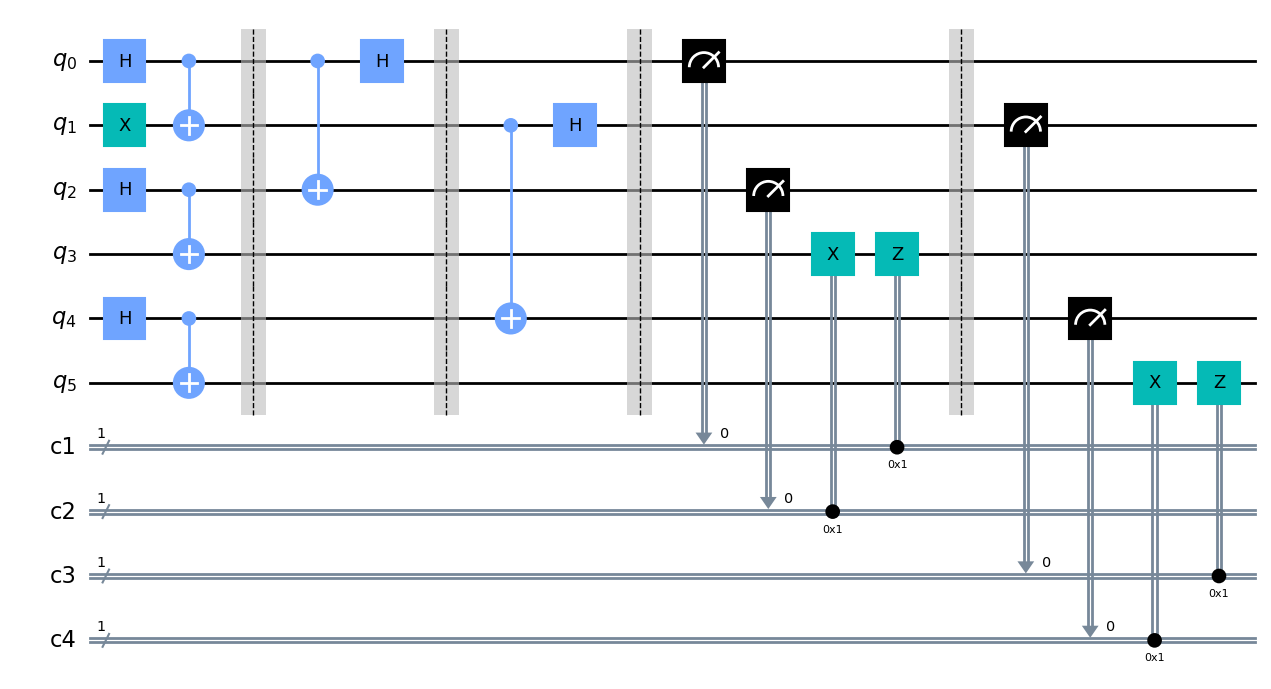

In [49]:
qreg_q = QuantumRegister(6, 'q')
creg_c1 = ClassicalRegister(1, 'c1')
creg_c2 = ClassicalRegister(1, 'c2')
creg_c3 = ClassicalRegister(1, 'c3')
creg_c4 = ClassicalRegister(1, 'c4')
circuit = QuantumCircuit(qreg_q, creg_c1, creg_c2, creg_c3, creg_c4)

circuit.h(qreg_q[2])
circuit.h(qreg_q[4])
circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[4], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
circuit.cx(qreg_q[1], qreg_q[4])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
circuit.measure(qreg_q[0], creg_c1[0])
circuit.measure(qreg_q[2], creg_c2[0])
circuit.x(qreg_q[3]).c_if(creg_c2, 1)
circuit.z(qreg_q[3]).c_if(creg_c1, 1)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
circuit.measure(qreg_q[1], creg_c3[0])
circuit.measure(qreg_q[4], creg_c4[0])
circuit.x(qreg_q[5]).c_if(creg_c4, 1)
circuit.z(qreg_q[5]).c_if(creg_c3, 1)

circuit.draw(output="mpl")

In [50]:
backend = Aer.get_backend('statevector_simulator')  
result = backend.run(transpile(circuit, backend)).result()
psi  = result.get_statevector(circuit)

# plot_state_qsphere(psi)


![alternative text](./statevector.png)

In [51]:
%%html
<style>
    table {float:left}
</style>


# 4 Quantum oracles

### 1. Identity circuit; 
f(0) = 0, f(1) = 1

|state|output|
|--|--|
|00|00|
|10|11|

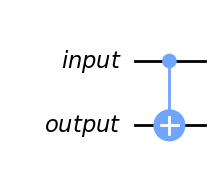

In [52]:
i = QuantumRegister(1, 'input')
o = QuantumRegister(1, 'output')

circuit = QuantumCircuit(i, o)
circuit.cx(0,1)
circuit.draw(output="mpl")

#### Transformation matrix 

$ \begin{bmatrix}
    1&0&0&0 \\
    0&0&0&1 \\
    0&0&1&0 \\
    0&1&0&0 \\
\end{bmatrix}$

### 2. Negation circuit; 
f(0) = 1, f(1) = 0

|state|output|
|--|--|
|00|10|
|01|01|

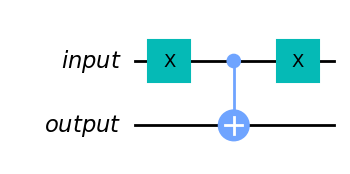

In [53]:
i = QuantumRegister(1, 'input')
o = QuantumRegister(1, 'output')

circuit = QuantumCircuit(i, o)
circuit.x(0)
circuit.cx(0,1)
circuit.x(0)
circuit.draw(output="mpl")

#### Transformation matrix 

$ \begin{bmatrix}
    0&0&1&0 \\
    0&1&0&0 \\
    1&0&0&0 \\
    0&0&0&1 \\
\end{bmatrix}$

### 3. Constant zero; 
f(0) = 0, f(1) = 0

|state|output|
|--|--|
|00|00|
|01|01|

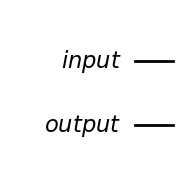

In [54]:
i = QuantumRegister(1, 'input')
o = QuantumRegister(1, 'output')

circuit = QuantumCircuit(i, o)
circuit.draw(output="mpl")

#### Transformation matrix 

$ \begin{bmatrix}
    1&0&0&0 \\
    0&1&0&0 \\
    0&0&1&0 \\
    0&0&0&1 \\
\end{bmatrix}$

### 4. Constant one; 
f(0) = 1, f(1) = 1

|state|output|
|--|--|
|00|10|
|01|11|



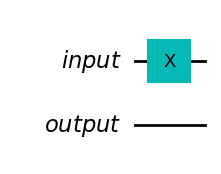

In [55]:
i = QuantumRegister(1, 'input')
o = QuantumRegister(1, 'output')

circuit = QuantumCircuit(i, o)
circuit.x(0)
circuit.draw(output="mpl")

#### Transformation matrix 

$ \begin{bmatrix}
    0&0&1&0 \\
    0&0&0&1 \\
    1&0&0&0 \\
    0&1&0&0 \\
\end{bmatrix}$

# 5. Clone with CNOT gate.

CNOT gates can be used to clone a bit when the state to copy is either $|0 \rangle \quad or \quad |1\rangle $


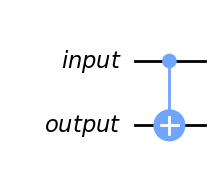

In [56]:
i = QuantumRegister(1, 'input')
o = QuantumRegister(1, 'output')

circuit = QuantumCircuit(i, o)
circuit.cx(i, o)

backend = Aer.get_backend('statevector_simulator')  
result = backend.run(transpile(circuit, backend)).result()
psi  = result.get_statevector(circuit)

circuit.draw(output="mpl")


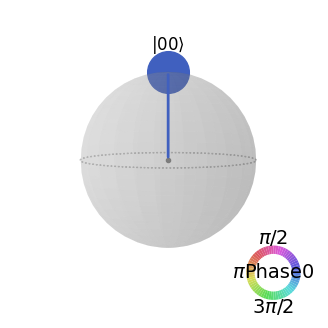

In [57]:
plot_state_qsphere(psi, figsize=(4,4))

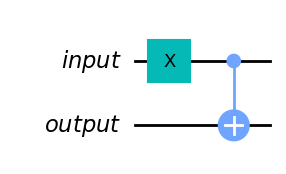

In [58]:
i = QuantumRegister(1, 'input')
o = QuantumRegister(1, 'output')

circuit = QuantumCircuit(i, o)
circuit.x(0)
circuit.cx(i, o)

backend = Aer.get_backend('statevector_simulator')  
result = backend.run(transpile(circuit, backend)).result()
psi  = result.get_statevector(circuit)

circuit.draw(output="mpl")


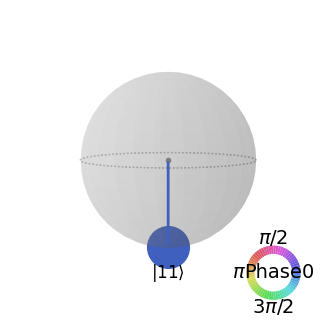

In [59]:
plot_state_qsphere(psi, figsize=(4,4))

# 6. Prove  or disprove this equation
$ U(|x \rangle |0 \rangle ) = |x \rangle |x \rangle  $

### Method 1
If we consider the above as a quantum circuit, U would resemble the CNOT gate. As per no cloning theorem, we cannot copy input state $|x \rangle $ over for all values of $x_1, x_2$. Hence disproved.

### Method 2

$ U (|x\rangle |0 \rangle = |x \rangle |x \rangle $ 

$ |x \rangle |0 \rangle = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} x_1 \\ 0 \\ x_2 \\ 0 \end{bmatrix} $

$|x \rangle |x \rangle = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \otimes \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} x_1^2 \\ x_1x_2 \\ x_1x_2 \\x_2^2 \end{bmatrix} $

$ U \begin{bmatrix} x_1 \\ 0 \\ x_2 \\ 0 \end{bmatrix} = \begin{bmatrix} x_1^2 \\ x_1x_2 \\ x_1x_2 \\x_2^2 \end{bmatrix} $

One value of U that satisfies this equation is as below. However, this matrix is not Unitary.

U = $ \begin{bmatrix} x_1 & 0 & 0 & 0 \\ 0 & 0 & x_1 & 0 \\ 0 & 0 & x_1 & 0 \\ 0 & 0 & x_2 & 0 \end{bmatrix} $

Hence dispoved. 




# 7. Teleportation circuit.

The quantum teleportation cicuit is supposed to put $|\psi = a|0 \rangle> + b|1 \rangle $ onto qubit 3.

In the circuit below, we verifiy this by measurement. For example as below in Q0, if we have the following probabilities.

$ |\psi = \frac{\sqrt3}{2} |0 \rangle +  \frac{1}{2} |1 \rangle $

At the end of the circuit, if we do a measurement, we will get the same probablities for 0 and 1.

### Find $ U_8U_7U_6U_5U_4U_3U_2U_1 |\psi 00\rangle $

### Vector form 
____

$|\psi = a|0 \rangle + b|1 \rangle $

$ U_0 = |\psi 00\rangle = a|000\rangle + b |100\rangle $

#### $H_2$

$ U_1 = a|0\rangle H|0 \rangle |0\rangle + b|0\rangle H|0 \rangle |0\rangle  $

$ \quad = a|0 \rangle \begin{bmatrix} \frac{|0\rangle+|1\rangle}{\sqrt2}\end{bmatrix} |0\rangle + b|0 \rangle \begin{bmatrix} \frac{|0\rangle+|1\rangle}{\sqrt2}\end{bmatrix} |0\rangle $ 

$ \quad = \frac{1}{\sqrt2} (a|000 \rangle + a|010 \rangle + b|100 \rangle + b|110 \rangle) $

#### $CNOT (1,2)$ 

$ U2 =  \frac{1}{\sqrt2} (a|000 \rangle + a|011 \rangle + b|100 \rangle + b|111 \rangle) $ 

#### $CNOT (0,1)$ 

$ U3 =  \frac{1}{\sqrt2} (a|000 \rangle + a|011 \rangle + b|110 \rangle + b|101 \rangle) $ 

#### $ H_{0} $

$ U4 =  \frac{1}{2} (a|000 \rangle + a|100 \rangle + a|011 \rangle + a|111 \rangle + b|010 \rangle - b|110 \rangle + b|001 \rangle) - b|101 \rangle ) $ 

#### $ CNOT (1,2) $

$ U5 =  \frac{1}{2} (a|000 \rangle + a|100 \rangle + a|010 \rangle + a|110 \rangle + b|011 \rangle - b|111 \rangle + b|001 \rangle) - b|101 \rangle ) $ 

#### $ H_2 $

$ U6 =  \frac{1}{2\sqrt2} \begin{bmatrix} (a+b)|000 \rangle + (a-b)|001 \rangle + (a-b)|100 \rangle + (a+b)|101 \rangle + (a-b)|011 \rangle + (a+b)|010 \rangle +  (a+b)|110 \rangle  + (a+b)|111 \rangle) \end{bmatrix} $ 

#### $ CNOT (0,2) $

$ U7 =  \frac{1}{2\sqrt2} \begin{bmatrix} (a+b)|000 \rangle + (a-b)|001 \rangle + (a-b)|101 \rangle + (a+b)|100 \rangle + (a-b)|011 \rangle + (a+b)|010 \rangle +  (a+b)|111 \rangle  + (a+b)|110 \rangle) \end{bmatrix} $ 

#### $ H2 $

$ U8 =  \frac{1}{2} \begin{bmatrix} a|000 \rangle + b|001 \rangle + b|101 \rangle + a|100 \rangle + a|010 \rangle + b|011 \rangle +  a|110 \rangle  + b|111 \rangle) \end{bmatrix} $ 

$ U8 =  \frac{1}{2} \begin{bmatrix} |00\rangle (a|0 \rangle + b|1 \rangle) + |01\rangle (a|0 \rangle + b|1 \rangle) + |10\rangle (a|0 \rangle + b|1 \rangle) +  |11\rangle (a|0 \rangle + b|1 \rangle) \end{bmatrix} $ 

#### Matrix form 
____

In [60]:
matrix = [[ 0.5,  0,  0.5,  0,  0,  0.5,0, -0.5],[ 0.5,  0,  0.5, -0, -0, -0.5,-0,  0.5],[ 0.5,  0, -0.5,  0,  0,  0.5, 0,  0.5],[ 0.5,  0, -0.5,  0, -0, -0.5, 0, -0.5],[ 0,  0.5,  0, -0.5,  0.5,  0, 0.5,  0],[-0,  0.5, -0, -0.5, -0.5,  0,-0.5, -0. ],[ 0,  0.5,  0,  0.5,  0.5,  0,-0.5,  0. ],[-0,  0.5,  0,  0.5, -0.5,  0, 0.5,  0]]
np.array(matrix)

array([[ 0.5,  0. ,  0.5,  0. ,  0. ,  0.5,  0. , -0.5],
       [ 0.5,  0. ,  0.5,  0. ,  0. , -0.5,  0. ,  0.5],
       [ 0.5,  0. , -0.5,  0. ,  0. ,  0.5,  0. ,  0.5],
       [ 0.5,  0. , -0.5,  0. ,  0. , -0.5,  0. , -0.5],
       [ 0. ,  0.5,  0. , -0.5,  0.5,  0. ,  0.5,  0. ],
       [ 0. ,  0.5,  0. , -0.5, -0.5,  0. , -0.5, -0. ],
       [ 0. ,  0.5,  0. ,  0.5,  0.5,  0. , -0.5,  0. ],
       [ 0. ,  0.5,  0. ,  0.5, -0.5,  0. ,  0.5,  0. ]])

### Write a program which implements and verify the teleportation algorithm.

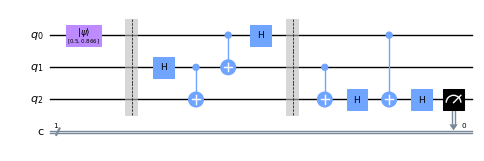

In [61]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.initialize([1/2, sqrt(3)/2], 0)
# circuit.x(qreg_q[0])

# circuit.initialize([sqrt(3)/2,  1/2 ], 0)

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.h(qreg_q[2])
circuit.measure(qreg_q[2], creg_c[0])

circuit.draw(output="mpl", scale=0.5)

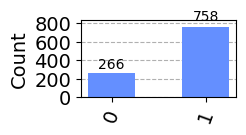

In [62]:
sim = Aer.get_backend('aer_simulator')

job = execute(circuit, sim)
result = job.result()

counts = result.get_counts()
plot_histogram(counts, figsize=(2,1))

In [63]:

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.h(qreg_q[2])

sim = Aer.get_backend('unitary_simulator')

job = execute(circuit, sim)
result = job.result()
print(result.get_unitary(decimals=1))

Operator([[ 0.5-0.j,  0. +0.j,  0.5-0.j,  0. -0.j,  0. +0.j,  0.5-0.j,
            0. +0.j, -0.5+0.j],
          [ 0.5-0.j,  0. +0.j,  0.5-0.j, -0. -0.j, -0. -0.j, -0.5+0.j,
           -0. -0.j,  0.5-0.j],
          [ 0.5-0.j,  0. +0.j, -0.5+0.j,  0. +0.j,  0. +0.j,  0.5-0.j,
            0. -0.j,  0.5-0.j],
          [ 0.5-0.j,  0. +0.j, -0.5+0.j,  0. +0.j, -0. -0.j, -0.5+0.j,
            0. +0.j, -0.5+0.j],
          [ 0. +0.j,  0.5-0.j,  0. +0.j, -0.5+0.j,  0.5-0.j,  0. +0.j,
            0.5-0.j,  0. -0.j],
          [-0. +0.j,  0.5-0.j, -0. +0.j, -0.5+0.j, -0.5+0.j,  0. -0.j,
           -0.5+0.j, -0. +0.j],
          [ 0. +0.j,  0.5-0.j,  0. -0.j,  0.5-0.j,  0.5-0.j,  0. +0.j,
           -0.5+0.j,  0. +0.j],
          [-0. +0.j,  0.5-0.j,  0. -0.j,  0.5-0.j, -0.5+0.j,  0. -0.j,
            0.5-0.j,  0. -0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


# 8. N-bit toffoli gate

(i) Write down the truth table of this gate.

|X1|X2|X3|X4|X1'|X2'|X3'| output |
|--|--|--|--|--|--|--|--|
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 1 | 0 | 0 | 0 | 1 |
| 0 | 0 | 1 | 0 | 0 | 0 | 1 | 0 |
| 0 | 0 | 1 | 1 | 0 | 0 | 1 | 1 |
| 0 | 1 | 0 | 0 | 0 | 1 | 0 | 0 |
| 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 |
| 0 | 1 | 1 | 0 | 0 | 1 | 1 | 0 |
| 0 | 1 | 1 | 1 | 0 | 1 | 1 | 1 |
| 1 | 0 | 0 | 0 | 1 | 0 | 0 | 0 |
| 1 | 0 | 0 | 1 | 1 | 0 | 0 | 1 |
| 1 | 0 | 1 | 0 | 1 | 0 | 1 | 0 |
| 1 | 0 | 1 | 1 | 1 | 0 | 1 | 1 |
| 1 | 1 | 0 | 0 | 1 | 1 | 0 | 0 |
| 1 | 1 | 0 | 1 | 1 | 1 | 0 | 1 |
| 1 | 1 | 1 | 0 | 1 | 1 | 1 | 1 |
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0 |


(ii) is this gate reversible ? 

Yes, the gate is reversible. 
The transformation matrix for this gate is as below. 

 $ \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 
\end{bmatrix}  $

Lets take a specific example from the truth table above and the example below shows that the opeartion is reversible.

|1110> => |1111> => |1110>

Hence the gate is reversible 


In [64]:
a = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0.],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0.],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.]])

one = np.array([0,1]).transpose()
zero = np.array([1,0]).transpose()

# state 1110

istate = np.kron(np.kron(np.kron(one, one), one), zero)

print ('state 1110')

print ("Input ", istate)

ostate = np.matmul(istate, a)

print ("Output ", ostate)

iostate = np.matmul(a, ostate)

print ("Reverse ", iostate)

print ("Compare : ", iostate == istate) 

# state 0111

print ('state 0111')

istate = np.kron(np.kron(np.kron(zero, one), one), one)

print ("Input ", istate)

ostate = np.matmul(istate, a)

print ("Output ", ostate)

iostate = np.matmul(a, ostate)

print ("Reverse operation", iostate)

print ("Compare : ", iostate == istate) 


state 1110
Input  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Output  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Reverse  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Compare :  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
state 0111
Input  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Output  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Reverse operation [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Compare :  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


### Give a circuit implementing this gate using our know quantum gates.


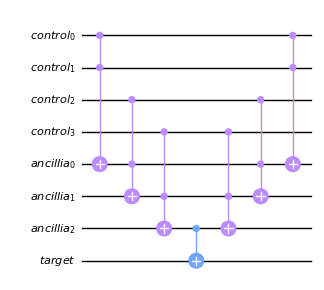

In [65]:
n = 4

ctrl = QuantumRegister(n, 'control')
anc = QuantumRegister(n-1, 'ancillia')
target = QuantumRegister(1, 'target')

circuit = QuantumCircuit(ctrl, anc, target)

# compute
circuit.ccx(ctrl[0], ctrl[1], anc[0])

for i in range(2, n):
    circuit.ccx(ctrl[i], anc[i-2], anc[i-1])

# copy
circuit.cx(anc[n-2], target[0])

# uncompute
for i in range(n-1, 1, -1):
    circuit.ccx(ctrl[i], anc[i-2], anc[i-1])
    
circuit.ccx(ctrl[0], ctrl[1], anc[0])    

circuit.draw(output="mpl", scale=0.5)

# 9. Toffoli gate 

3 bit toffolli gate is represented by the following truth table.

|x1|x2|x3|x1'|x2'|output|
|-|-|-|-|-|-|
| 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 1 | 0 | 0 | 1 |
| 0 | 1 | 0 | 0 | 1 | 0 |
| 0 | 1 | 1 | 0 | 1 | 1 |
| 1 | 0 | 0 | 1 | 0 | 0 |
| 1 | 0 | 1 | 1 | 0 | 1 |
| 1 | 1 | 0 | 1 | 1 | 1 |
| 1 | 1 | 1 | 1 | 1 | 0 |



### (i) Show that this Toffoli gate is reversible.

In order to show that the gate is reversible, we can process any input above and get an output. 
Use the output to get the input again using matrix transformation. 
Transformation matrix for 3-bit toffoli gate is as below. 

The following block tries to reverse a state 110 to 111 and back.

In [66]:
a= np.array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.]])

# Example state = 110

istate = np.kron(np.kron(one, one), zero).transpose()

print (istate)

ostate = np.matmul(a, istate)

print (ostate)

iostate = np.matmul(a, ostate)

print (iostate)


[0 0 0 0 0 0 1 0]
[0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 1. 0.]


### (ii) Express NOT(a) in terms of the Toffoli gate.

If we can fix the inputs for b and c to be always 1 then a toffoli gate can do a NOT operation.

#### Method 1
if the target qubit should hold the value of NOT(a), then b should always be 1 and c would have the flipped value of a. 

|a|b|c|output|
|-|-|-|-|
|0|1|1|011|
|1|1|1|110|

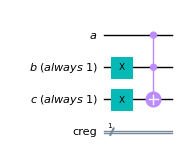

In [67]:
qreg_qa = QuantumRegister(1, 'a')
qreg_qb = QuantumRegister(1, 'b (always 1)')
qreg_qc = QuantumRegister(1, 'c (always 1)')

creg_c = ClassicalRegister(1, 'creg')
circuit = QuantumCircuit(qreg_qa,qreg_qb,qreg_qc, creg_c)

circuit.x(qreg_qb[0])
circuit.x(qreg_qc[0])

circuit.ccx(qreg_qa[0], qreg_qb[0], qreg_qc[0])

circuit.draw(output="mpl", scale=0.5)

#### Method 2, if bit A needs to be flipped in place. 

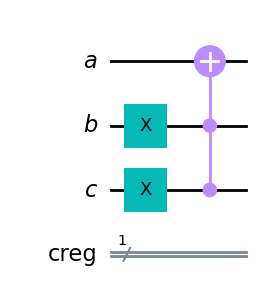

In [68]:
qreg_qa = QuantumRegister(1, 'a')
qreg_qb = QuantumRegister(1, 'b')
qreg_qc = QuantumRegister(1, 'c')

creg_c = ClassicalRegister(1, 'creg')
circuit = QuantumCircuit(qreg_qa,qreg_qb,qreg_qc, creg_c)

circuit.x(qreg_qb[0])
circuit.x(qreg_qc[0])
circuit.ccx(qreg_qc[0], qreg_qb[0], qreg_qa[0])

circuit.draw(output="mpl")

### Express AND(a,b) in terms of the Toffoli gate.

If C is always 0, it will only be flipped if A and B are 1 which is the truth table of AND as below.

|a|b|c|output|
|-|-|-|-|
|0|0|0|000|
|0|1|0|010|
|1|0|0|100|
|1|1|0|111|

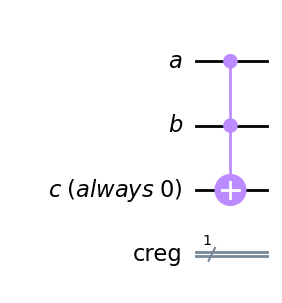

In [69]:
qreg_qa = QuantumRegister(1, 'a')
qreg_qb = QuantumRegister(1, 'b')
qreg_qc = QuantumRegister(1, 'c (always 0)')

creg_c = ClassicalRegister(1, 'creg')
circuit = QuantumCircuit(qreg_qa,qreg_qb,qreg_qc, creg_c)

circuit.ccx(qreg_qa[0], qreg_qb[0], qreg_qc[0])

circuit.draw(output="mpl")

### Express OR(a, b) in terms of the Toffoli gate.

If we need to satisfy the following truth table, we need to introduce negation on A and B input lines and C is always 1. In case the input is 0, 0 for A and B respectively, then it is translated to 1,1 and C is flipped from 1 to 0.

|a|b|c|output|
|-|-|-|-|
|0|0|0|000|
|0|1|0|011|
|1|0|0|101|
|1|1|0|111|



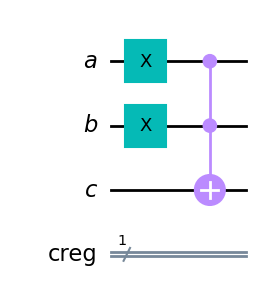

In [70]:
qreg_qa = QuantumRegister(1, 'a')
qreg_qb = QuantumRegister(1, 'b')
qreg_qc = QuantumRegister(1, 'c')

creg_c = ClassicalRegister(1, 'creg')
circuit = QuantumCircuit(qreg_qa, qreg_qb, qreg_qc, creg_c)

circuit.x(0)
circuit.x(1)

circuit.ccx(qreg_qa[0], qreg_qb[0], qreg_qc[0])

circuit.draw(output="mpl")

# 10. Draw the quantum circuit representing the state below. 

Reverse tracing the state. 

$ |\psi \rangle = \frac{1}{2} \begin{bmatrix} |000 \rangle + |011 \rangle + |110 \rangle - |101 \rangle \end{bmatrix} $

$ \quad = \frac{1}{\sqrt2} \begin{bmatrix} |0 \rangle \frac{(|00 \rangle + |11 \rangle )}{\sqrt2} + |1 \rangle \frac{(10 \rangle - |01 \rangle)}{\sqrt2} \end{bmatrix} $

$ \quad = \frac{1}{\sqrt2} \begin{bmatrix} |0 \rangle (CNOT_{1,2} H_1 (|0 \rangle |0 \rangle)) + |1\rangle (CNOT_{1,2} H_1 Z_2 (|1 \rangle |1 \rangle))  \end{bmatrix} $

$ \quad = \frac{1}{\sqrt2} CNOT_{1,2} H_1 Z_2  (|000 \rangle + |111 \rangle ) $

The following code constructs the state and its a valid quantum state ( probabilities add up to 1 )

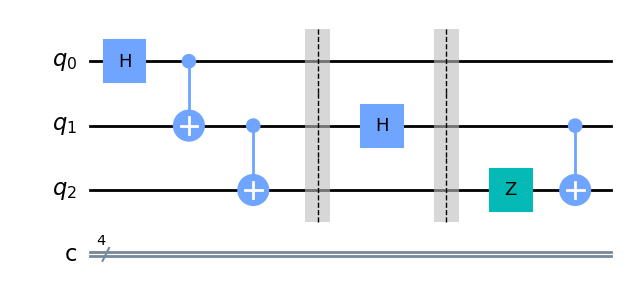

In [71]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.z(qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])

circuit.draw(output="mpl")



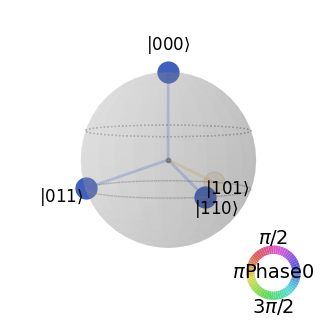

In [72]:
backend = Aer.get_backend('statevector_simulator')  
result = backend.run(transpile(circuit, backend)).result()
psi  = result.get_statevector(circuit)

plot_state_qsphere(psi, figsize=(4,4))